## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/drive')
drive_path = '/drive/My Drive/Capstone Project/Hotel Bookings.csv'
df = pd.read_csv(drive_path)

Mounted at /drive


In [ ]:
df1= df.copy()

# **Data Exploration**

In [ ]:
# Checking first 5 rows
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#checking the shape ( rows and column numbers)
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [ ]:
# Checking last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data Description:**

**1. hotel :** Hotel(Resort Hotel or City Hotel)

**2. is_canceled :** Value indicating if the booking was canceled (1) or not (0)

**3. lead_time :** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**4. arrival_date_year :** Year of arrival date

**5. arrival_date_month :** Month of arrival date

**6. arrival_date_week_number :** Week number of year for arrival date

**7. arrival_date_day_of_month :** Day of arrival date

**8. stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**9. stays_in_week_nights :** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**10. adults :** Number of adults

**11. children :** Number of children

**12. babies :** Number of babies

**13. meal :** Type of meal booked. Categories are presented in standard hospitality meal packages:

**14. country :**Country of origin.`

**15. market_segment :** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**16. distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**17. is_repeated_guest :**Value indicating if the booking name was from a repeated guest (1) or not (0)

**18. previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

**19. previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

**20. reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**21. assigned_room_type :** Code for the type of room assigned to the booking.

**22. booking_changes :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**23. deposit_type :**Indication on if the customer made a deposit to guarantee the booking.

**24. agent :** ID of the travel agency that made the booking

**25. company :** ID of the company/entity that made the booking or responsible for paying the booking.

**26. days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer

**27. customer_type :** Type of booking, assuming one of four categories

**a) adr :** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**b) required_car_parking_spaces :** Number of car parking spaces required by the customer

**c) total_of_special_requests :** Number of special requests made by the customer (e.g. twin bed or high floor)

**d) reservation_status :** Reservation last status, assuming one of three categories

***Cancelled –*** booking was canceled by the customer

***Check-Out –*** customer has checked in but already departed

***No-Show –*** customer did not check-in and did inform the hotel of the reason why

**1. reservation_status_date :** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [ ]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Data Cleaning**
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:

1.Remove duplicate rows.

2.Handling missing values.

3.Convert columns to appropriate datatypes.

4.Adding important columns





In [ ]:
# checking for the duplicate rows
df1.duplicated().value_counts()    #true means duplicate rows

False    87396
True     31994
dtype: int64

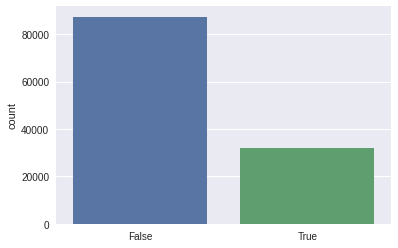

In [ ]:
# Checking for duplicated row
sns.countplot(x=df1.duplicated())

Hence, We have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

In [ ]:
#dropping the duplicate rows
df1= df1.drop_duplicates()

In [ ]:
# data set reduced
df1.shape

(87396, 32)

In [ ]:
#checking for Null Values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


Text(0.5, 1.0, 'Places of missing values in column')

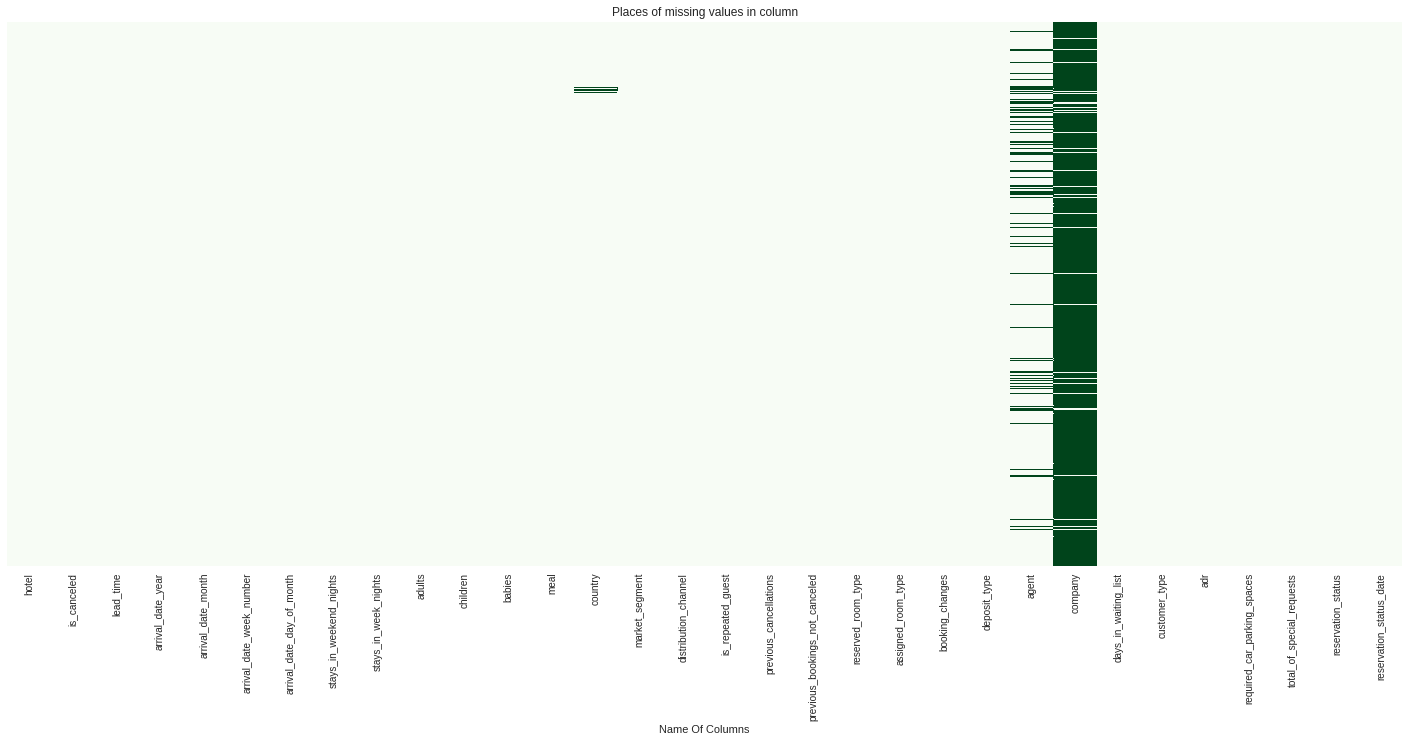

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False,cmap='Greens')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

**We have null values in Company, Agent, Children, Country:-**

We Have Null values in columns- Company, agent, Country,children.

1.For company and agent I will fill the Missing values with 0.

2.For country I will fill Missing values with Object 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)

3.As the counting of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [ ]:
df1.drop('company', axis=1, inplace=True)
null_columns = ['agent', 'children']
for col in null_columns:
    df1[col].fillna(0, inplace=True)
    
# Replacing NA values with other    
df1['country'].fillna('others', inplace=True)

In [ ]:
# Successfully handles null values
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
# dropping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
len(df1[df1['adults']+df1['babies']+df1['children']==0])
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace=True)

In [ ]:
# Lets add some new columns
df1['total_people'] = df1['adults']  + df1['babies'] + df1['children']
df1['total_stay'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

In [ ]:
# Checking the final rows and columns
df1.shape

(87230, 33)

**Exploratory Data Analysis (EDA):**


***Hotel Bookings Data***

**1. Which distribution route gave ADR the most boost in terms of income?**

Text(0.5, 1.0, 'ADR across Distribution channel')

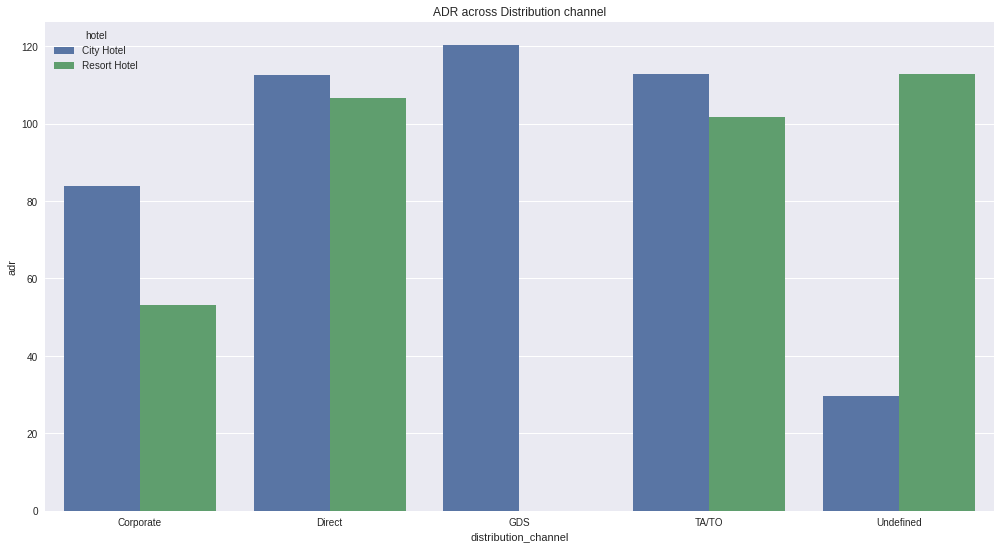

In [ ]:
distribution_channel_df = df1.groupby(['hotel', 'distribution_channel'])['adr'].mean().reset_index()

plt.figure(figsize=(17, 9))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

**Corporate-** Bookings are made possible by these business hotel booking firms.

GDS-A GDS serves as a global link between travellers and suppliers, including hotels and other lodging establishments. It enables automated transactions and provides real-time product, pricing, and availability data to travel agencies and internet booking engines.

Direct reservations are those that are made with the specific hotels.

Bookings are done through travel agents or tour operators (**TA/TO-**).

**Undefined-** Bookings are vague. Maybe consumers made their reservations when they arrived.

20th observation

1. In both categories of hotels, "Direct" and "TA/TO" have contributed to ADR roughly equally.
2. The 'City Hotel' form of ADR has greatly benefited from GDS.
3. GDS must increase reservations for resort hotels.

**2. How are the needed automobile parking spots distributed in terms of percentage?**

In [ ]:
car_parking_space = df1['required_car_parking_spaces'].value_counts()
car_parking_space

0    79924
1     7273
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

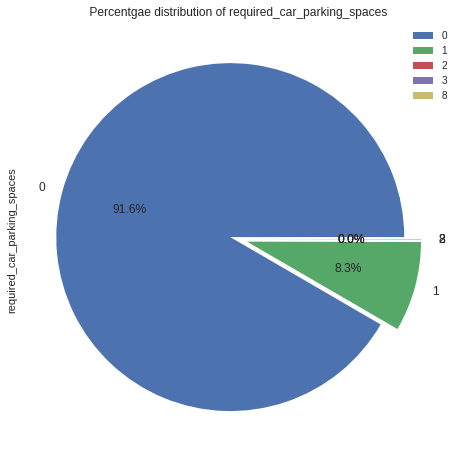

In [ ]:
# Visualising data by pie chart.

car_parking_space.plot.pie(explode=[0.05]*5,autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=12)

plt.title(" Percentgae distribution of required_car_parking_spaces ")
plt.legend()
plt.show() 

observation: 93.8% of the guests didn't need a parking place. Only 6.2% of visitors needed more than one parking place.

**3. What is the Deposit Type Percentage Distribution?**

In [ ]:
# Fetch the data from deposite_type

distrubution_of_deposite_type = df1['deposit_type'].value_counts()
distrubution_of_deposite_type

No Deposit    86085
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

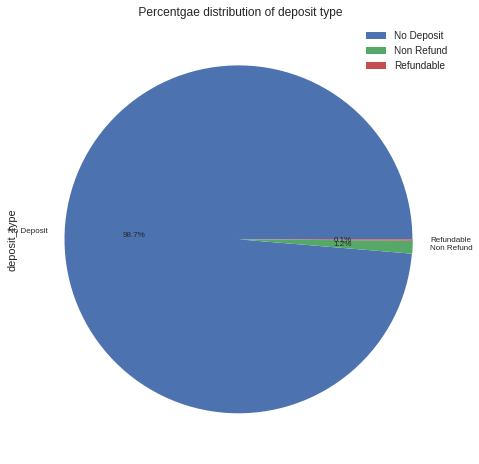

In [ ]:
# Visualizsing data by pie chart.

distrubution_of_deposite_type.plot.pie(explode=[0.001]*3, autopct='%1.1f%%', shadow=False, figsize=(20,8), fontsize=8)

plt.title(" Percentgae distribution of deposit type")
plt.legend()
plt.show() 

Objection : 98.7% of visitors like "No deposit type" bookings.

**4. What is the average duration of stay at each hotel?**

In [ ]:
# creating dataframe for stay
stay_df = df1[df1['is_canceled']==0]
stay_df =stay_df[stay_df['total_stay'] < 15]
stay_df =stay_df.rename(columns={'is_canceled':'Number_of_stay'})

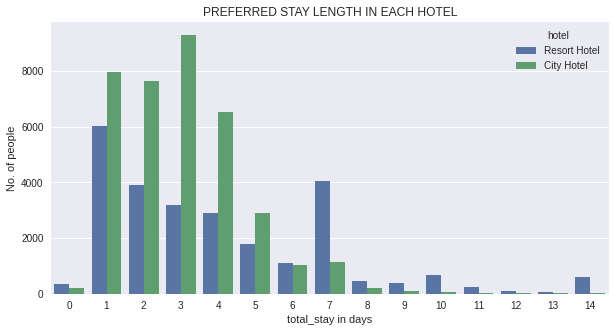

In [ ]:
# set plot size and plot barchart
plt.figure(figsize = (10,5))
plt.title('PREFERRED STAY LENGTH IN EACH HOTEL')
sns.countplot(x = stay_df['total_stay'], hue = stay_df['hotel'])

plt.xlabel('total_stay in days')
plt.ylabel('No. of people')
plt.show()

 observation The ideal stay in any kind of hotel is no longer than seven days.

**5. Which hotel generates more money?**





In [ ]:
# dataframe for revenue
revenue_df = df1.groupby('hotel')['adr'].mean().reset_index().rename(columns={'adr':'avg_adr'})  # calculating average adr
revenue_df

,hotel,avg_adr
0,City Hotel,111.271969
1,Resort Hotel,99.059517


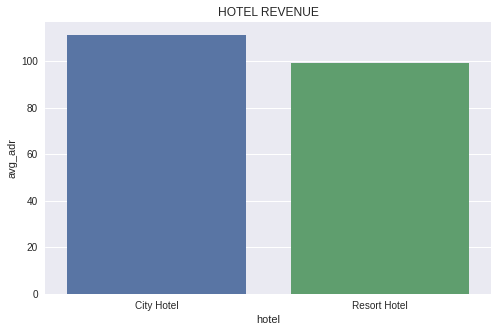

In [ ]:
plt.figure(figsize = (8,5))
plt.title('HOTEL REVENUE')

# Setting x and y value
sns.barplot(x = revenue_df['hotel'], y = revenue_df['avg_adr'])
plt.show()

 observation:

1. The usual lead time for city hotels is a little longer than for resort hotels.

2. As a result, a city hotel earns a little bit more money than a vacation hotel.

**6. Which hotel requires customers to wait the longest for a booking confirmation?**

In [ ]:
# dataframe of waiting for booking
waiting_df = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index().rename(columns = {'days_in_waiting_list':'Avg_waiting_time'})
waiting_df

,hotel,Avg_waiting_time
0,City Hotel,1.020066
1,Resort Hotel,0.316763


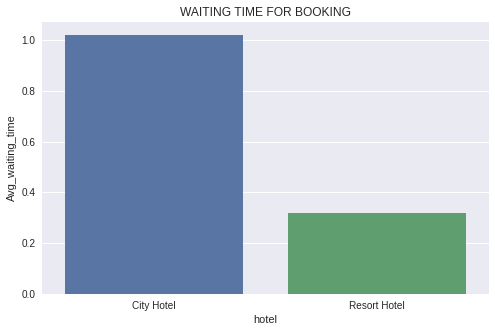

In [ ]:
plt.figure(figsize = (8,5))
plt.title('WAITING TIME FOR BOOKING')
sns.barplot(x = waiting_df['hotel'], y = waiting_df['Avg_waiting_time'] )
plt.show()

observation

1. The wait times at city hotels are much longer than at resort hotels.

2. As a result, City Hotel is considerably busier than Resort Hotel.

**7. Whether the stay is during the week or the weekend?**

---



(0.0, 12.0)

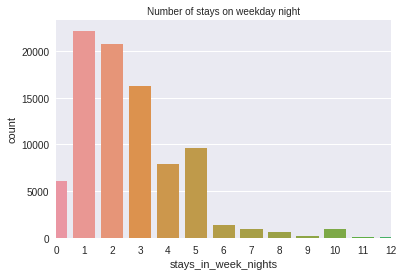

In [ ]:
sns.countplot(data = df1, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 10)
plt.xlim(0,12)

(0.0, 6.0)

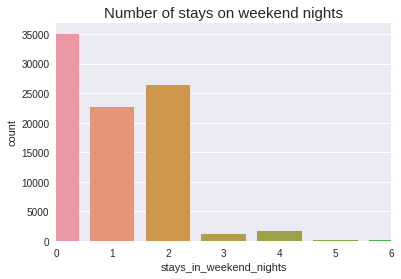

In [ ]:
sns.countplot(data = df1, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 15)
plt.xlim(0,6)

Observation number 18:
The majority of stays occur on weekday nights. Everything we saw for the chart on the day of the month was arbitrary.

**8. Which channel is contributing most for early booking of the hotel?**

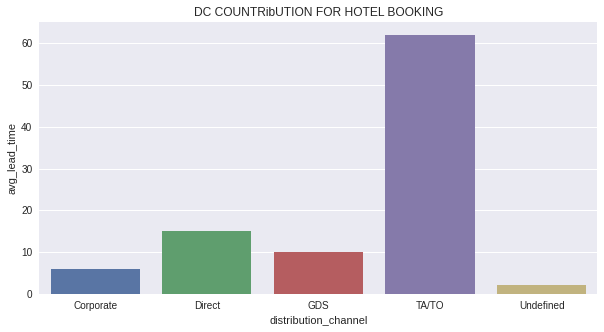

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'avg_lead_time'})



plt.figure(figsize = (10,5))
sns.barplot(x = d2['distribution_channel'], y = d2['avg_lead_time'])
plt.title("DC COUNTRibUTION FOR HOTEL BOOKING")
plt.show()

**Observation 8:** 
1. We came to the conclusion that TA/TO has accounted for the majority of the reservations we've had.
2. The smallest corporate booking we have gotten, other from undefined.

**9.Which distribution channel brings better revenue generating deals for hotels?**

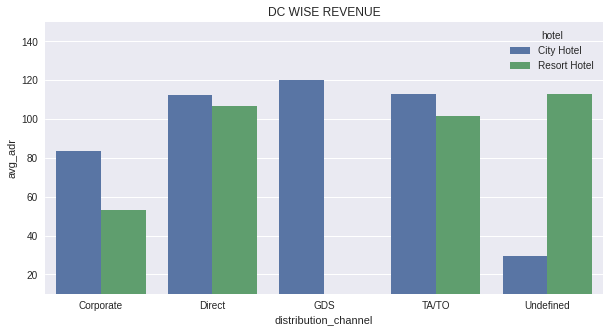

In [ ]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})


plt.figure(figsize = (10,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(10,150)
plt.title("DC WISE REVENUE")
plt.show()


**Observation 9:**

1.GDS is the channel that generates the highest money, but only for City hotels. In comparison to other methods of distribution, its impact on Resort Hotel is minimal.

2.Undefined can be linked to a variety of distribution channels, the data for which is not supplied, so as a result, reservations through TA/TO are what bring in the greatest money for the Resort Hotel.

3.In addition to other distribution channels, direct bookings also play a significant role in producing income, but we need to place more of an emphasis on other, lower-yielding channels in order to boost overall revenue.

Q10) What is the distribution among the listed hotels?



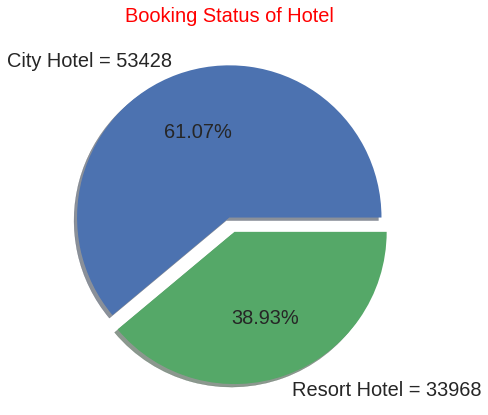

In [ ]:
# Displaying distribution of hotels
total_booking = df1.groupby('hotel')['hotel'].count()
myexplode = [0,0.1]
mylabels = ['City Hotel = 53428', 'Resort Hotel = 33968']
fig = plt.figure(figsize =(7, 7))
plt.title(label='Booking Status of Hotel',fontsize=20, color='red')
plt.pie(total_booking, explode = myexplode, labels = mylabels, shadow = True, autopct='%1.2f%%', textprops={'fontsize': 20})
plt.show() 